Importar librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#configuración de pandas para mostrar todas las cols (100 en este caso)
pd.set_option('display.max.columns', 100) 

Lectura del dataset


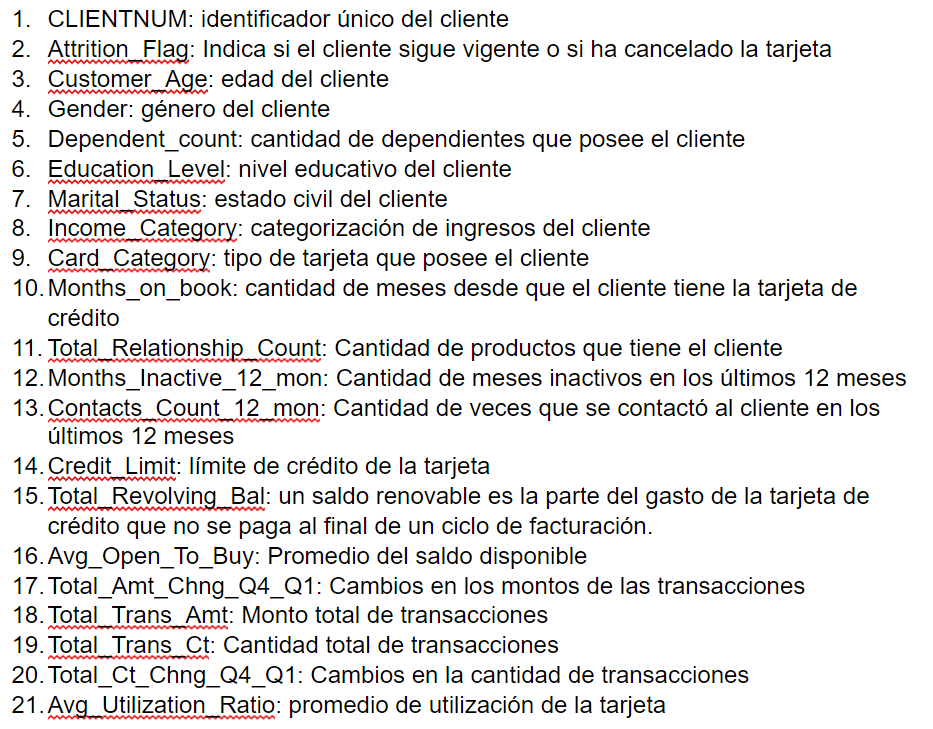

In [ ]:
df = pd.read_csv('BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


clientiun: identificador unico del cliente (se elimina porque no aporta nada al estudio)

In [ ]:
df=df.drop(['CLIENTNUM'], axis=1)

## EDA

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Cantidad de valores únicos por cada variable categórica

In [ ]:
df.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
for col in df.select_dtypes(['object']).columns:
  print(col, '\n')
  print('Cantidad de valores unicos: ', df[col].nunique())
  if df[col].nunique()<15:
    print(df[col].value_counts())
  print('----------------\n')

Attrition_Flag 

Cantidad de valores unicos:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------

Gender 

Cantidad de valores unicos:  2
F    5358
M    4769
Name: Gender, dtype: int64
----------------

Education_Level 

Cantidad de valores unicos:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------

Marital_Status 

Cantidad de valores unicos:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------

Income_Category 

Cantidad de valores unicos:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------

Card_Category 

Cantidad de valores unicos:  4
Blue        9436
Silver     

Cantidad de personas que cancelan tarjeta segun sus ingresos

In [ ]:
df[df['Attrition_Flag']=='Attrited Customer'].groupby('Income_Category').size() 

Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
dtype: int64

Edad promedio de los clientes

In [ ]:
df.Customer_Age.mean() 

46.32596030413745

Nivel educativo más presente es Graduate

In [ ]:
df.Education_Level.value_counts(normalize=True)

Graduate        0.309
High School     0.199
Unknown         0.150
Uneducated      0.147
College         0.100
Post-Graduate   0.051
Doctorate       0.045
Name: Education_Level, dtype: float64

Cantidad de Clientes Existentes y Cancelados

In [ ]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

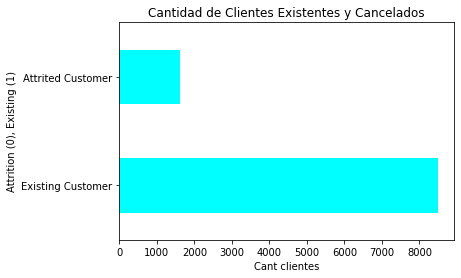

In [ ]:
ax = df.Attrition_Flag.value_counts().plot.barh(
    color = 'cyan',
    title = 'Cantidad de Clientes Existentes y Cancelados'
    )

ax.set_xlabel("Cant clientes")
ax.set_ylabel("Attrition (0), Existing (1)")

plt.show()

### Analisis de Nulos

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df=df.replace('Unknown', np.nan)

In [ ]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

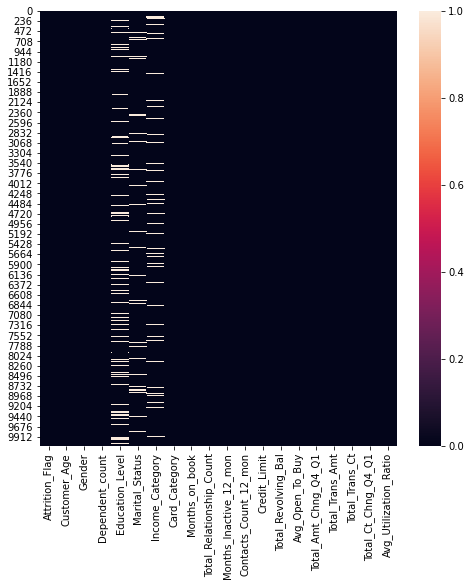

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
ax = sns.heatmap(df.isnull())

In [ ]:
# función para rellenar aleatoriamente los nulos con valores del dataset 
def imputar_sampleo(x):
    import random
    df.loc[df[df[x].isnull()][x].index,x] = np.random.choice(df[df[x].notnull()][x])
    return df

In [ ]:
#categoricas_nan = ['Income_Category', 'Marital_Status', 'Education_Level'] 

df = imputar_sampleo('Income_Category')
df = imputar_sampleo('Marital_Status')
df = imputar_sampleo('Education_Level')

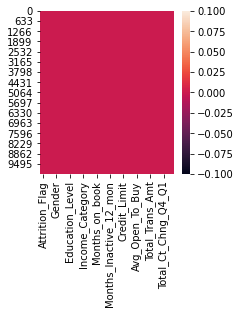

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3))
ax = sns.heatmap(df.isnull())

### Análisis de outliers

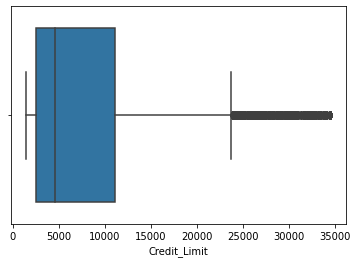

In [ ]:
sns.boxplot(data=df, x='Credit_Limit')

In [ ]:
lista_income = ['Less than $40K',  '$40K - $60K', '$60K - $80K']

In [ ]:
def drop_outliers(pf, umbral=3):
  Q1 = pf.Credit_Limit.quantile(0.25)
  Q3 = pf.Credit_Limit.quantile(0.75)
  IQR = Q3 - Q1
  umbral_outlier = IQR * umbral
  outlier=(pf.Credit_Limit>umbral_outlier).sum()
  pf = pf.drop(pf[(pf['Credit_Limit'] == 34516.000) & (pf['Income_Category'].isin(lista_income))].index)
  return pf

# nueva que ya borra los que elegimos 

In [ ]:
df = drop_outliers(df)
df.shape

(10037, 20)

### Análisis de distribución de las variables



##### Matriz de correlación

In [ ]:
df.Attrition_Flag=df.Attrition_Flag.replace({'Existing Customer':1, 'Attrited Customer':0 })

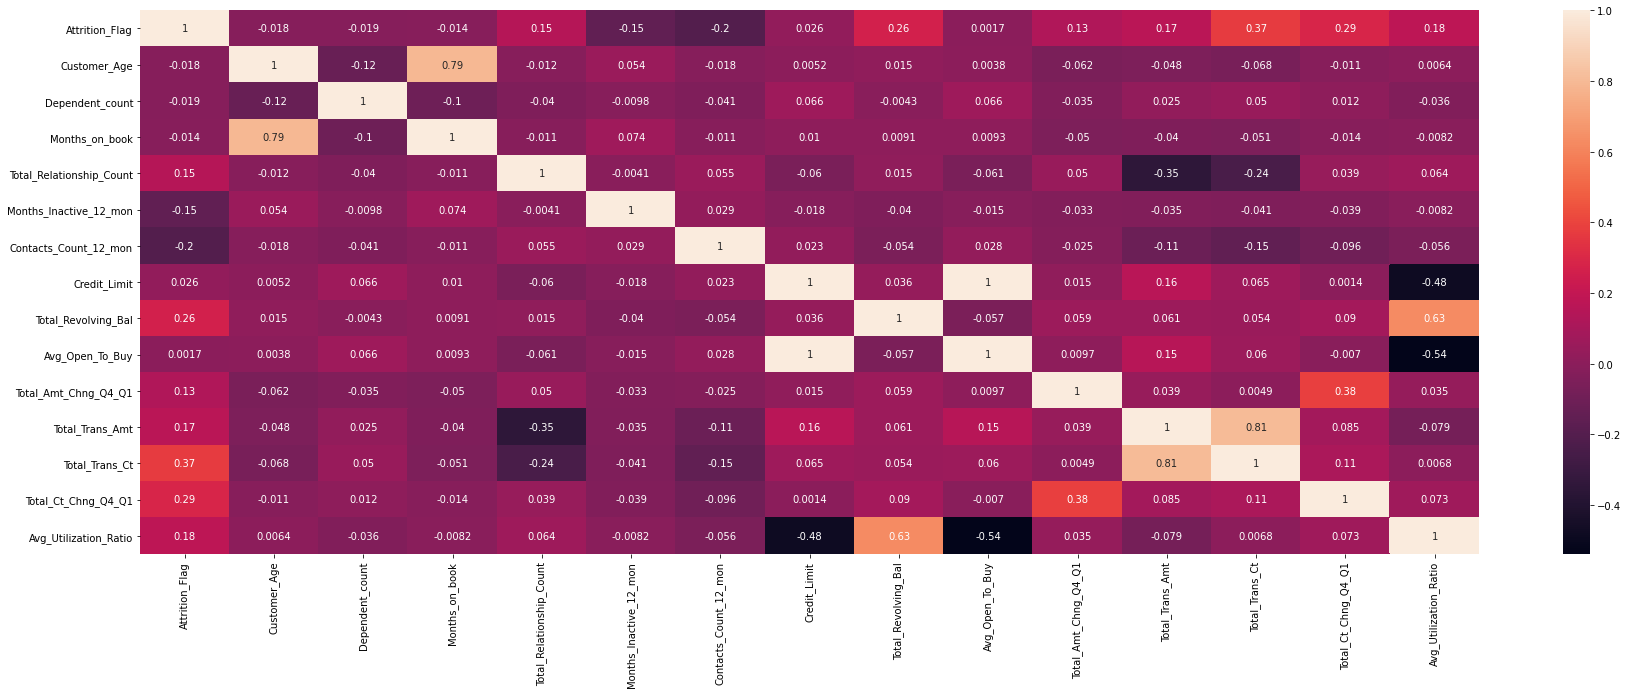

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr()[['Attrition_Flag']]

,Attrition_Flag
Attrition_Flag,1.000
Customer_Age,-0.018
Dependent_count,-0.019
Months_on_book,-0.014
Total_Relationship_Count,0.150
Months_Inactive_12_mon,-0.151
Contacts_Count_12_mon,-0.204
Credit_Limit,0.026
Total_Revolving_Bal,0.264
Avg_Open_To_Buy,0.002


In [ ]:
df=df.drop(['Avg_Open_To_Buy'], axis=1) # eliminación de la variable por tener correlación de 0% con el target

##### Análisis univariado

Se realiza para aquellas variables que se encontró mayor correlación

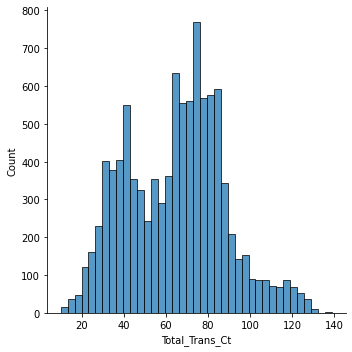

In [ ]:
sns.displot(df.Total_Trans_Ct)
# Total_Trans_Ct: total de transacciones del cliente

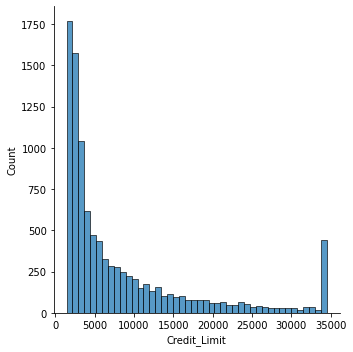

In [ ]:
sns.displot(df.Credit_Limit) 
# Credit limit

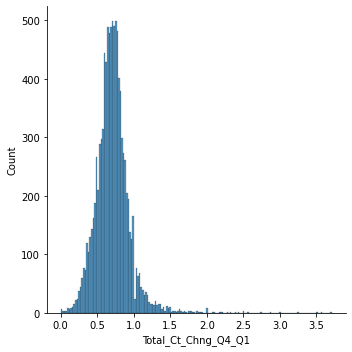

In [ ]:
sns.displot(df.Total_Ct_Chng_Q4_Q1) 
# Cambio en la cantidad de transacciones

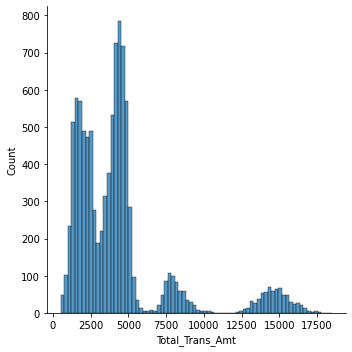

In [ ]:
sns.displot(df.Total_Trans_Amt)
# Monto de la cantidad total de transacciones

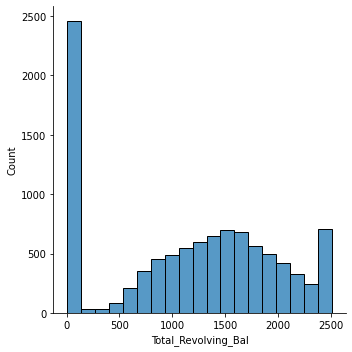

In [ ]:
sns.displot(df.Total_Revolving_Bal)
# Saldo remanente de cada mes

##### Análisis multivariado

Se realiza para analizar las más relacionadas en función de su abandono y encontrar patrones de relación.

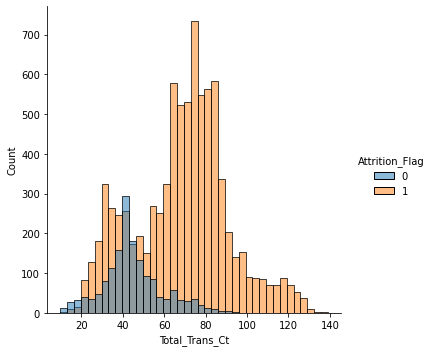

In [ ]:
sns.displot(data=df,
           x=df.Total_Trans_Ct,
           hue=df.Attrition_Flag)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

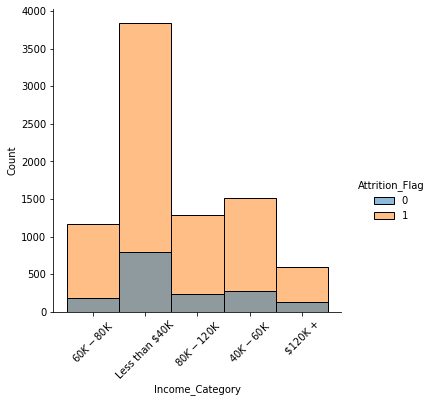

In [ ]:
sns.displot(data=df,
           x=df.Income_Category,
           hue=df.Attrition_Flag)
plt.xticks(rotation=45)

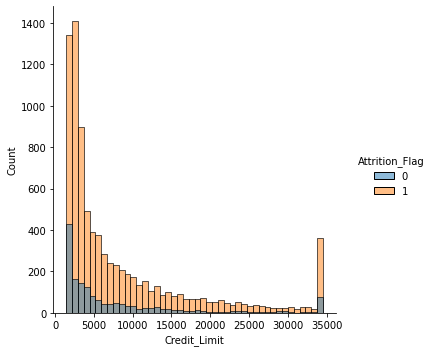

In [ ]:
sns.displot(data=df,
           x=df.Credit_Limit,
           hue=df.Attrition_Flag)

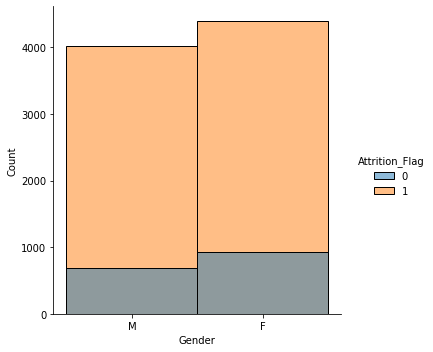

In [ ]:
sns.displot(data=df,
           x=df.Gender,
           hue=df.Attrition_Flag)


Se realizó, en primer lugar, el análisis de nulos, asignandole a las variables categoricas, que son las que tienen valores Unknown, un valor en forma aleatoria, dicho valor se encuentra dentro del set de datos. Luego se realizó el análisis de outliers y las distribuciones multi y univariada de las variables de mayor interés.
Como paso posterior, se realiza la división TRAIN, TEST y luego el preprocesamiento de las variables categóricas, incluyendo el target (attrition flag) entre ellas. 
La matriz de correlación (realizada en esta parte porque es el momento en el que ya tenemos todas las variables numéricas).
Se efectua el sampleo SMOTE sobre el TRAIN.
 


## División en train y test

División en target y atributos

In [ ]:
X = df.drop('Attrition_Flag', axis=1)
y = df.Attrition_Flag

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=33)

In [ ]:
X_train.shape

(7527, 18)

In [ ]:
X_test.shape

(2510, 18)

## Variables categóricas con pipeline de datos

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [ ]:
class Gender (BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        mapper = {'M':0 ,  'F':1}
        col_mapped = x.replace(mapper)
        return col_mapped

In [ ]:
class Income(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}
        col_mapped = x.replace(mapper)
        return col_mapped

In [ ]:
class Education(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        mapper = {'Uneducated':1 ,  'High School':2, 'College':3, 'Graduate':4,  'Post-Graduate':5, 'Doctorate':6}
        col_mapped = x.replace(mapper)
        return col_mapped

Pipeline final obtenido para preprocesar el set de datos de atributos (no tiene el target)

In [ ]:
preprocesador = make_column_transformer ( 
    (OneHotEncoder(),['Marital_Status','Card_Category']),
    (Gender(),['Gender']),
    (Income(),['Income_Category']),
    (Education(),['Education_Level']),
    (StandardScaler(),['Credit_Limit',
                       'Total_Revolving_Bal', 
                       'Total_Trans_Amt'] ),
    remainder='passthrough'
)

Aplicación del pipeline a los atributos. 

In [ ]:
X_train_tranform = pd.DataFrame(preprocesador.fit_transform(X_train))

In [ ]:
X_train_tranform.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,5.000,1.000,2.958,0.523,0.916,52.000,2.000,43.000,1.000,2.000,2.000,0.745,81.000,0.688,0.046
1,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,4.000,0.144,-0.236,3.102,32.000,1.000,24.000,1.000,1.000,2.000,0.647,115.000,0.742,0.100
2,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,5.000,2.000,0.177,-1.433,-0.070,53.000,1.000,45.000,6.000,2.000,3.000,0.676,74.000,0.644,0.000


In [ ]:
X_train_tranform.columns=['Marital_Status_0',
                     'Marital_Status_1',
                     'Marital_Status_2',
                     'Card_Cat_0',
                     'Card_Cat_1',
                     'Card_Cat_2',
                     'Card_Cat_3',
                     'Gender',
                     'Income',
                     'Education_Level',
                     'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Total_Trans_Amt',
                     'Customer_Age',   
                     'Dependent_count',
                     'Months_on_book',
                     'Total_Relationship_Count',
                     'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon',
                     'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio']

In [ ]:
X_train_tranform.head(3)

,Marital_Status_0,Marital_Status_1,Marital_Status_2,Card_Cat_0,Card_Cat_1,Card_Cat_2,Card_Cat_3,Gender,Income,Education_Level,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,5.000,1.000,2.958,0.523,0.916,52.000,2.000,43.000,1.000,2.000,2.000,0.745,81.000,0.688,0.046
1,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000,4.000,0.144,-0.236,3.102,32.000,1.000,24.000,1.000,1.000,2.000,0.647,115.000,0.742,0.100
2,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,5.000,2.000,0.177,-1.433,-0.070,53.000,1.000,45.000,6.000,2.000,3.000,0.676,74.000,0.644,0.000


In [ ]:
X_train_tranform.shape

(7527, 23)

## Técnicas de sampleo

In [ ]:
y_train.value_counts()

1    6336
0    1191
Name: Attrition_Flag, dtype: int64

### SMOTE 


Aplicamos técnica de sampleo para generar nuevos puntos, similares a los existentes
y ampliar la base de datos. 

Se amplica con un sampling_strategy=0.5 para que el resultado final tenga el target
balanceado a un 50% para cada categoría.

Se realiza en este momento del proceso de datos porque se necesita un dataset compuesto únicamente
por valores numéricos.

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
over_smote=SMOTE(sampling_strategy=0.5)

In [ ]:
X_train_over, y_train_over=over_smote.fit_resample(X_train_tranform, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X_train_over.shape

(9504, 23)

## Comparación de modelos

Decidimos implementar: 
- Decision Tree
- Support Vector Machine
- KNN
- Logistic Regression
- Random Forest

Se realizará primero un GridSearch para verificar cuales son los mejores 
hiperparámetros para cada uno de ellos y luego se implementará un Cross Validation
para comprobar cuales de los modelos presenta mejor desempeño.

### Grid Search

Para realizar esto se realizó el pipeline de cada modelo (este no incluye el preprocesador 
porque los datos ya llegan preprocesados). Luego, se declara un diccionario con los hiperparámetros
de interés (específico de cada modelo). Si el resultado obtenido es el máx o mín de los hiper puestos,
hay que renovarlos poniendo n° más grandes o más chicos respectivamente.

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
DT_pipeline = make_pipeline(DecisionTreeClassifier())
DT_params = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
       'decisiontreeclassifier__max_depth':[5,7,9,10,11, 13, 17,20]}

In [ ]:
grid_DT = GridSearchCV(DT_pipeline,  param_grid=DT_params)
grid_DT.fit(X_train_over, y_train_over)
grid_DT.score(X_train_over, y_train_over)

print("Best parameter (CV score=%0.3f):" % grid_DT.best_score_)
print(grid_DT.best_params_)

Best parameter (CV score=0.942):
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 20}


#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_pipeline = make_pipeline(SVC())
SVM_params = {'svc__C': [0.1, 1],
              'svc__gamma': [1, 0.01],
              'svc__kernel': ['rbf'],
              'svc__probability': [True]}

In [ ]:
grid_SVM = GridSearchCV(SVM_pipeline, SVM_params)
grid_SVM.fit(X_train_over, y_train_over)
grid_SVM.score(X_train_over, y_train_over)

print("Best parameter (CV score=%0.3f):" % grid_SVM.best_score_)
print(grid_SVM.best_params_) 

# score para 'rbf': 0.714 

Best parameter (CV score=0.915):
{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf', 'svc__probability': True}


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_pipeline = make_pipeline(KNeighborsClassifier())
KNN_params = {'kneighborsclassifier__n_neighbors': [2,3,5], 
              'kneighborsclassifier__weights': ['uniform', 'distance'],
              'kneighborsclassifier__metric': ['euclidean', 'manhattan']} 

In [ ]:
grid_KNN = GridSearchCV(KNN_pipeline, KNN_params)
grid_KNN.fit(X_train_over, y_train_over)
grid_KNN.score(X_train_over, y_train_over)

print("Best parameter (CV score=%0.3f):" % grid_KNN.best_score_)
print(grid_KNN.best_params_) 

Best parameter (CV score=0.937):
{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__weights': 'distance'}


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_pipeline = make_pipeline(LogisticRegression())
LR_params = {'logisticregression__solver': ['newton-cg', 'liblinear'], #'lbfgs','sag','saga'
              'logisticregression__penalty': ['l2'], #'l2','elastic-net'
              'logisticregression__C': [0.1,1]} 

In [ ]:
grid_LR = GridSearchCV(LR_pipeline, LR_params)
grid_LR.fit(X_train_over, y_train_over)
grid_LR.score(X_train_over, y_train_over)

print("Best parameter (CV score=%0.3f):" % grid_LR.best_score_)
print(grid_LR.best_params_) 

Best parameter (CV score=0.874):
{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


#### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_pipeline = make_pipeline(RandomForestClassifier())
RF_params = {'randomforestclassifier__n_estimators': [20, 30, 50], 
              'randomforestclassifier__max_features': ['auto', 'sqrt'], 
              'randomforestclassifier__max_depth': [3, 5, 6], 
              'randomforestclassifier__min_samples_split': [2,5], 
              'randomforestclassifier__min_samples_leaf': [1,2], 
             } 

In [ ]:
grid_RF = GridSearchCV(RF_pipeline, RF_params)
grid_RF.fit(X_train_over, y_train_over)
grid_RF.score(X_train_over, y_train_over)

print("Best parameter (CV score=%0.3f):" % grid_RF.best_score_)
print(grid_RF.best_params_) 

Best parameter (CV score=0.936):
{'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 20}


### Cross Validation 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


Para cada modelo a entrenar con k-fold se usa el resultado de gridSearch (grid.best_estimator), esto es porque va cambiando a veces con cada iteración y  de esta manera se asegura de utilizar los mejores parámetros actuales.

In [ ]:
metricas=['accuracy', 'recall', 'precision', 'f1']
modelos=[grid_KNN.best_estimator_, 
         DecisionTreeClassifier(criterion='entropy', max_depth=10),
         grid_SVM.best_estimator_,
         grid_RF.best_estimator_,
         grid_LR.best_estimator_
        ]

KFold para TRAIN

In [ ]:
fprlist = []
tprlist = []

for i in range(0, len(modelos)):
   modelo = modelos[i]
   modelo_pipe = make_pipeline(modelo)
   fold = KFold(n_splits=4, random_state=1, shuffle=True)
   scores = cross_validate(modelo_pipe,
                          X_train_over,
                          y_train_over,
                          scoring=metricas,
                          cv=fold,
                          n_jobs=-1)

   modelo_pipe.fit(X_train_over, y_train_over)
   probs = modelo_pipe.predict_proba(X_train_over)
   probs = probs[:, 1]
   fpr, tpr, umbral = roc_curve(y_train_over, probs)
   fprlist.append(fpr)
   tprlist.append(tpr)

   print('\n \033[1m', str(modelo)[24:50], '  \033[0;0m \n')
   print('Accuracy:', scores['test_accuracy'].mean())
   print('Recall:', scores['test_recall'].mean())
   print('Precision:', scores['test_precision'].mean())
   print('F1:', scores['test_f1'].mean())
   print('-----------------------------------')



         steps=[('kneighbors    

Accuracy: 0.9330808080808082
Recall: 0.9184057027971025
Precision: 0.9799565997562268
F1: 0.9481814190741146
-----------------------------------

  cp_alpha=0.0, class_weight    

Accuracy: 0.9451809764309764
Recall: 0.9581808360185163
Precision: 0.9595433768226131
F1: 0.9588550433132662
-----------------------------------

         steps=[('svc',
        

Accuracy: 0.9110900673400673
Recall: 0.9350851224619847
Precision: 0.9317407843494315
F1: 0.933405219410809
-----------------------------------

         steps=[('randomfore    

Accuracy: 0.9327651515151516
Recall: 0.9711135459923316
Precision: 0.9310053423272708
F1: 0.9506313499272951
-----------------------------------

         steps=[('logisticre    

Accuracy: 0.8734217171717171
Recall: 0.9177397819260052
Precision: 0.89515394890663
F1: 0.9062574512230857
-----------------------------------


### ROC curve

Luego de determinar cuales son los mejores parámetros con GrisSearch y de verificar cuál modelo tiene mejor desempeño con Cross Validation (K-Folds), se procede a hacer la curva ROC para complemetar el análisis de kfold y poder seleccionar el mejor modelo antes de tomar la decisión de entrenarlo.

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(12, 7))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    for i in range(0, len(fpr)):
        plt.plot(fpr[i], tpr[i], label=str(modelos[i])[39:60])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

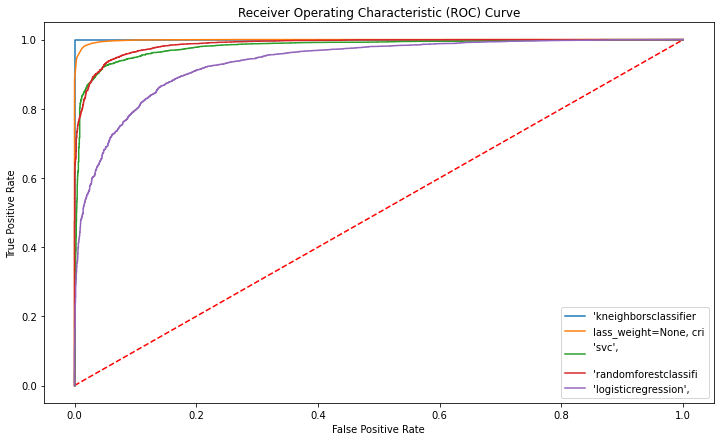

In [ ]:
plot_roc_curve(fprlist, tprlist)

## Elección de modelo final: Árbol de Decisión

Se seleccionó el modelo del árbol de decisión por ser el de mayor F1, mayor accuracy y por tener un alto valor de recall. A su vez, decidimos seleccionarlo ya que en comparación con RF (el cual también presenta valores aceptables) posee menor costo computacional. Un último punto que influyó fue la curva ROC

Una vez determinado eso, se entrena el modelo completo, se realizan sus predicciones y se analizan sus métricas de desempeño.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Crear árbol de decisión

In [ ]:
model_tree = grid_DT.best_estimator_ 

Entrenar

In [ ]:
model_tree.fit(X_train_over, y_train_over)

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=20,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

Score en TRAIN

In [ ]:
model_tree.score(X_train_over, y_train_over)

1.0

Gráfico

In [ ]:
X_test_transform=pd.DataFrame(preprocesador.transform(X_test))

In [ ]:
y_pred = model_tree.predict(X_test_transform)

Métricas en TEST

In [ ]:
model_tree.score(X_test_transform, y_test)

0.9354581673306773

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
# 'Existing Customer':1, 'Attrited Customer':0 

array([[ 337,   83],
       [  79, 2011]])

In [ ]:
(y_pred == 1).sum()

2094

In [ ]:
(y_test == 1).sum()

2090

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.9354581673306773
Precision Score : 0.9603629417383
Recall Score : 0.9622009569377991
F1 Score : 0.9612810707456979


##Gráfico de Explainability

In [ ]:
!pip install shap
!pip install ipywidgets

     |████████████████████████████████| 358kB 6.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=0c279803c0849e51201f76c5399ceeb77e1f46e1eee9598d9f57f85407ac1080
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

In [ ]:
model_tree

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=17,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [ ]:
modelo_entrenado = model_tree

In [ ]:
#X_test_pred=pd.DataFrame(preprocesador.transform(X_test))
#X_test_transform = pd.DataFrame(preprocesador.transform(X_test))

In [ ]:
explainer = shap.KernelExplainer(modelo_entrenado.predict, X_test_transform)

Using 2532 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Se mide que tan importante es cada atributo para la prediccion, con esto podremos observar las variables que mas importancia tienen y su correlacion. A modo de prueba tomamos solo las primeras 20 observaciones para que sea mas rapido el procesamiento. 

In [ ]:
shap_values = explainer.shap_values(X_test_transform.iloc[:20,:])

In [ ]:
X_test_transform.columns=['Marital_Status_0',
                     'Marital_Status_1',
                     'Marital_Status_2',
                     'Card_Cat_0',
                     'Card_Cat_1',
                     'Card_Cat_2',
                     'Card_Cat_3',
                     'Gender',
                     'Income',
                     'Education_Level',
                     'Credit_Limit',
                     'Total_Revolving_Bal',
                     'Total_Trans_Amt',
                     'Customer_Age',   
                     'Dependent_count',
                     'Months_on_book',
                     'Total_Relationship_Count',
                     'Months_Inactive_12_mon',
                     'Contacts_Count_12_mon',
                     'Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio']

En este grafico se puede observar como esta tomando las decisiones nuestro modelo. Las variables que tienen mayor impacto a la hora de decidir si una persona va a dar de baja la tarjeta o no son las 5 primeras, ya que las restantes, a partir de estas, casi no se despegan del 0, es decir, no son significativas. Se puede observar que, por ejemplo, para cantidades elevadas de transacciones, variable Total_Trans_ct, tiende al 1, o sea, la persona no va a dar de baja la tarjeta.

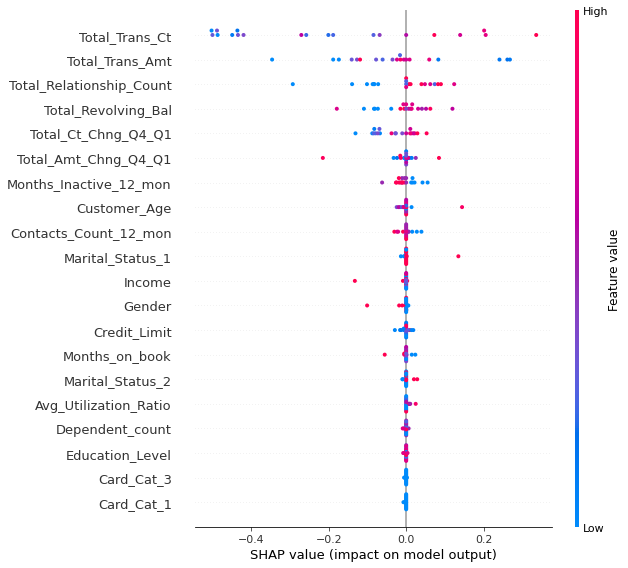

In [ ]:
shap.summary_plot(shap_values, X_test_transform.iloc[:20, :])

Se procede a efectuar la interpretacion de 2 casos particulares y, porque el modelo esta prediciendo de esta manera. El primer caso se trata de una persona que va a abandonar la tarjeta, mientras que en el segundo caso sucede lo contrario. 

In [ ]:
X_test_transform.iloc[12,:]

Marital_Status_0            0.000
Marital_Status_1            1.000
Marital_Status_2            0.000
Card_Cat_0                  1.000
Card_Cat_1                  0.000
Card_Cat_2                  0.000
Card_Cat_3                  0.000
Gender                      1.000
Income                      1.000
Education_Level             4.000
Credit_Limit               -0.758
Total_Revolving_Bal        -1.415
Total_Trans_Amt            -0.547
Customer_Age               49.000
Dependent_count             4.000
Months_on_book             38.000
Total_Relationship_Count    5.000
Months_Inactive_12_mon      2.000
Contacts_Count_12_mon       4.000
Total_Amt_Chng_Q4_Q1        0.890
Total_Trans_Ct             45.000
Total_Ct_Chng_Q4_Q1         0.406
Avg_Utilization_Ratio       0.000
Name: 12, dtype: float64

In [ ]:
pd.DataFrame(y_test).iloc[12,:] #Abandona la tarjeta

Attrition_Flag    0
Name: 4863, dtype: int64

En este caso la prediccion es 0, es decir, da de baja la tarjeta y, como se puede observar las variables que tiran para abajo la prediccion, es decir al 0, son la cantidad de transacciones que es baja, el Total_Revolving_Bal y los cambios en la cantidad de transacciones que tambien son infimos.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[12], X_test_transform.iloc[12,:])

In [ ]:
X_test_transform.iloc[4,:]

Marital_Status_0            0.000
Marital_Status_1            0.000
Marital_Status_2            1.000
Card_Cat_0                  1.000
Card_Cat_1                  0.000
Card_Cat_2                  0.000
Card_Cat_3                  0.000
Gender                      0.000
Income                      4.000
Education_Level             4.000
Credit_Limit                0.541
Total_Revolving_Bal         0.172
Total_Trans_Amt            -0.896
Customer_Age               48.000
Dependent_count             3.000
Months_on_book             35.000
Total_Relationship_Count    6.000
Months_Inactive_12_mon      1.000
Contacts_Count_12_mon       0.000
Total_Amt_Chng_Q4_Q1        0.791
Total_Trans_Ct             37.000
Total_Ct_Chng_Q4_Q1         1.056
Avg_Utilization_Ratio       0.095
Name: 4, dtype: float64

In [ ]:
pd.DataFrame(y_test).iloc[4,:] #No da de baja la tarjeta

Attrition_Flag    1
Name: 114, dtype: int64

En este caso la prediccion es 1, es decir, no da de baja la tarjeta y, como se puede observar las variables que tienden a dicha prediccion son el saldo renovable alto, la alta cantidad de productos y el Total_Ct_Chng_Q4_Q1 tambien es elevado.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4], X_test_transform.iloc[4,:])